**Background:** 

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

**Data Description:**

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

**Goal(s):**

Predict if a customer is happy or not based on the answers they give to questions asked.

**Success Metrics:**

Reach 73% accuracy score or above.

**Import Libraries**

In [27]:
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

from src.visualization.visualize import Visualization
from src.features.build_features import split_data
from src.models.train_model import create_model

**Load and prepare Dataset**

In [28]:
project_dir = Path('__file__').resolve().parents[1]
file_path = project_dir.joinpath("data/raw/ACME-HappinessSurvey2020.csv")
file_path

PosixPath('/Users/fasmina/Desktop/projects/Apziva/CZOEj5rOoAXRl7os/data/raw/ACME-HappinessSurvey2020.csv')

In [29]:
data=pd.read_csv(file_path)
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [30]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [31]:
data.shape

(126, 7)

In [32]:
data.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [33]:
data.duplicated().sum()

16

In [34]:
data.drop_duplicates(keep='first',inplace=True)
data.shape

(110, 7)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       110 non-null    int64
 1   X1      110 non-null    int64
 2   X2      110 non-null    int64
 3   X3      110 non-null    int64
 4   X4      110 non-null    int64
 5   X5      110 non-null    int64
 6   X6      110 non-null    int64
dtypes: int64(7)
memory usage: 6.9 KB


In [36]:
happy_nums=data['Y'].loc[data['Y']==1].count()
total=len(data)
print(round(happy_nums/total*100,2),'% of happy customers')
print(100-round(happy_nums/total*100,2),'% of unhappy customers')

50.91 % of happy customers
49.09 % of unhappy customers


**Exploratory Data Analysis**

In [37]:
figures=Visualization(data)

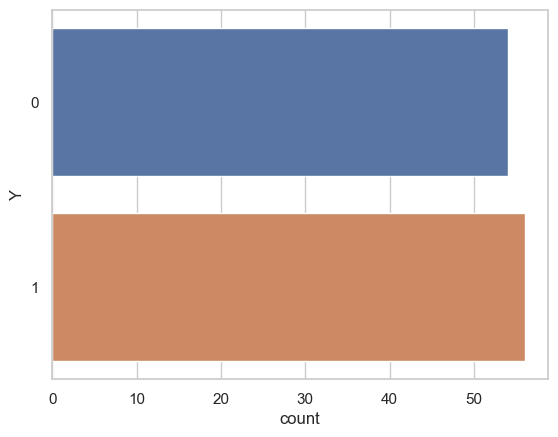

In [38]:
# graph.target_count(data)
figures.target_count()

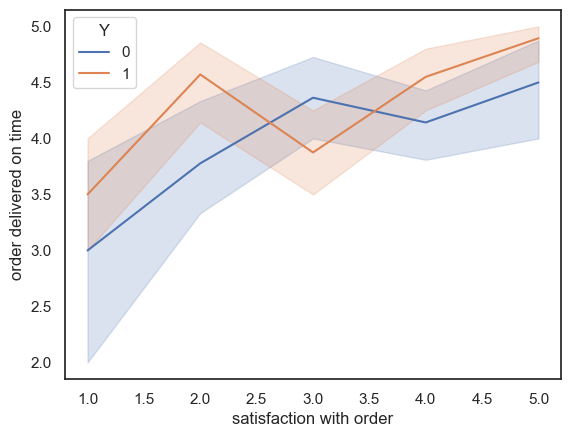

In [39]:
figures.comparison('X5','X1','Y')

It seems like customers are happy if the order is delivered on time with increasing level of satisfaction.

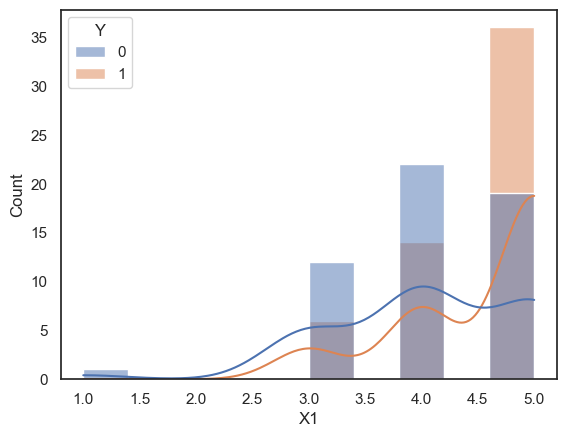

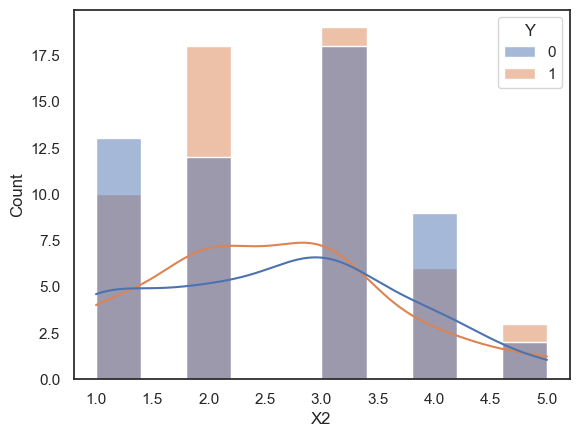

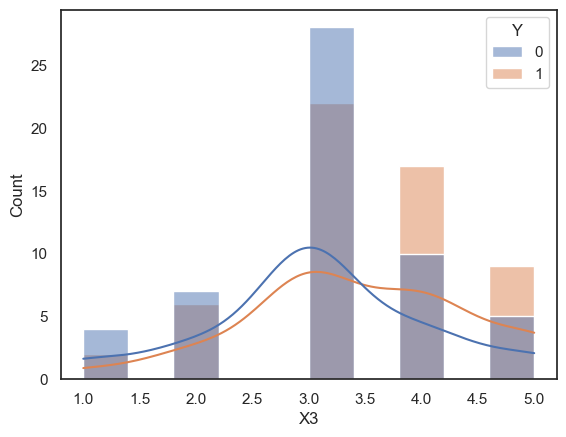

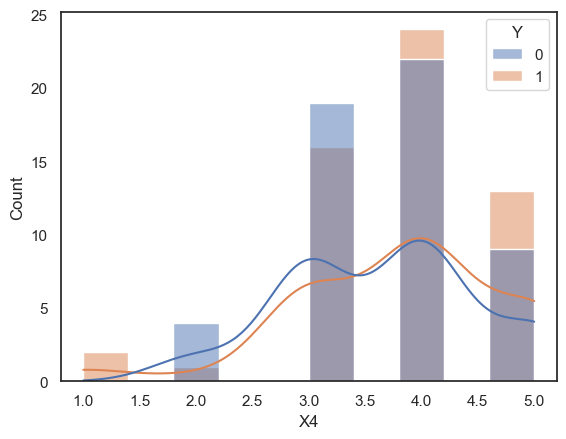

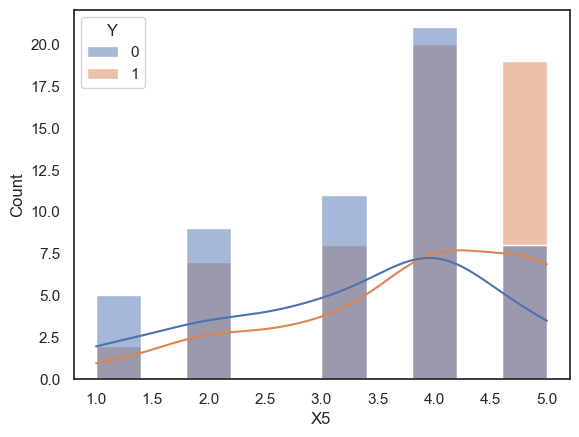

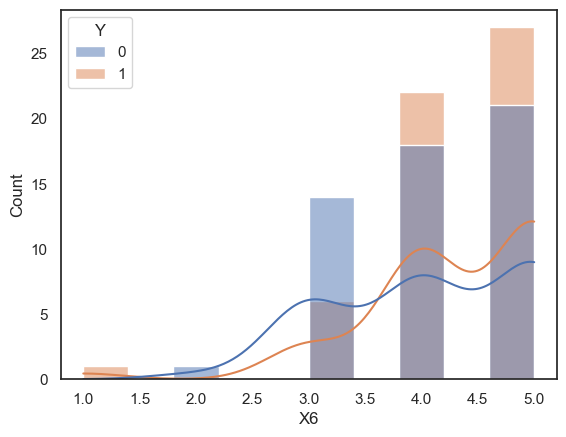

In [40]:
figures.feats_histplots('Y')

**Correlation between features**

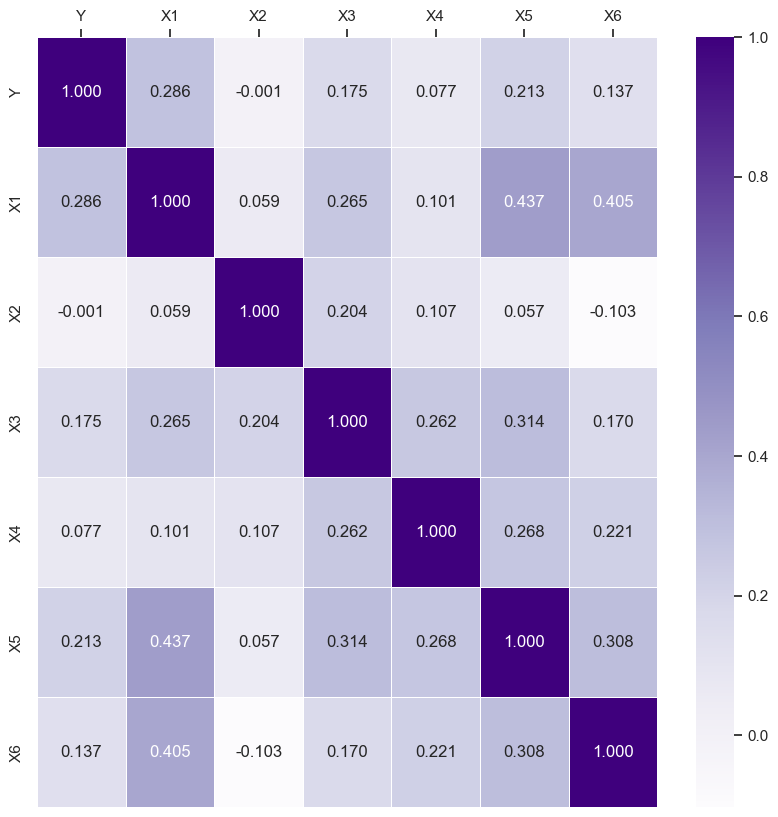

In [41]:
plt.figure(figsize=(10,10))
corr=data.corr()
ax=sns.heatmap(corr,annot=True,fmt='0.3f',linewidth=0.5,cmap='Purples')
ax.xaxis.tick_top()
plt.show()

From pearson correlation, it is clear that X4 and X2 are the least important features to predict customer satisfaction. So, we can drop X4.

**Preparing dataset to create model**

In [42]:
features=data.drop(['Y','X4','X2'],axis=1)
target=data['Y']

In [43]:
X_train,X_test,y_train,y_test =split_data(features,target,0.2,12)

(88, 4) (22, 4)
40     0
85     1
86     1
110    0
3      0
      ..
31     0
75     0
16     0
114    0
10     0
Name: Y, Length: 88, dtype: int64
115    0
90     0
29     1
48     1
61     1
100    1
42     0
46     1
2      1
43     0
57     0
87     0
124    0
116    1
1      0
11     0
44     1
105    1
74     1
56     0
20     1
15     1
Name: Y, dtype: int64


**compile model**

In [44]:
models = [
    (RandomForestClassifier, {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, None]}),
    (GradientBoostingClassifier, {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, None]}),
    (LogisticRegression, {'penalty': ['l1','l2'], 'C': [0.1, 1.0, 10.0]}),
    (DecisionTreeClassifier,{'criterion':['gini', 'entropy', 'log_loss'],'max_depth':[5,10,12,15,20,None],'min_samples_split':[2,4,6,10]}),
    (KNeighborsClassifier,{'n_neighbors':[5,7,9,10],'weights':['uniform', 'distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}),
    (LinearSVC,{'penalty':['l1','l2'],'loss':['hinge'],'C': [1.0,2.0,5.0]}),
    (RidgeClassifier,{'alpha':[1.0,3.0,5.0],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}),
    (ExtraTreesClassifier,{'n_estimators':[100,125,150,164],'criterion':['gini', 'entropy', 'log_loss'],'max_depth': [3, 5, None],'min_samples_split':[2,4,6,10]}),
    (AdaBoostClassifier,{'n_estimators':[50,60,75,80],'learning_rate':[1.0,1.3,1.5,1.9,2.0]})
]

In [45]:
create_model(X_train,X_test,y_train,y_test,models)

,model,f1_score,accuracy_score,roc_auc_score,elapsed_time,best_params
0,RandomForestClassifier,0.521739,0.500000,0.500000,1.836226,"{'max_depth': 5, 'n_estimators': 100}"
1,GradientBoostingClassifier,0.400000,0.454545,0.466667,1.447703,"{'max_depth': None, 'n_estimators': 100}"
2,LogisticRegression,0.727273,0.727273,0.733333,0.032820,"{'C': 1.0, 'penalty': 'l2'}"
3,DecisionTreeClassifier,0.476190,0.500000,0.508333,0.274594,"{'criterion': 'gini', 'max_depth': 15, 'min_sa..."
4,KNeighborsClassifier,0.583333,0.545455,0.541667,0.199248,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh..."
5,LinearSVC,0.620690,0.500000,0.475000,0.024247,"{'C': 2.0, 'loss': 'hinge', 'penalty': 'l2'}"
6,RidgeClassifier,0.727273,0.727273,0.733333,0.158977,"{'alpha': 1.0, 'solver': 'auto'}"
7,ExtraTreesClassifier,0.583333,0.545455,0.541667,53.212249,"{'criterion': 'entropy', 'max_depth': 5, 'min_..."
8,AdaBoostClassifier,0.692308,0.636364,0.625000,4.842035,"{'learning_rate': 1.9, 'n_estimators': 60}"


Based on results, however Logistic regression and Ridge classifier do have the same percentage of accuracy, time taken to create Logistic regression model is less than SVC. So, we can conclude Logistic regression (with parameters C=1.0 and penalty=l2) as the best model for this dataset.

**Logistic Regression**

In [46]:
model=LogisticRegression(C=1.0,penalty='l2')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=f1_score(y_test,y_pred)
print('Accuracy of the model is',round(accuracy,3)*100,'%')

Accuracy of the model is 72.7 %


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.80      0.67      0.73        12

    accuracy                           0.73        22
   macro avg       0.73      0.73      0.73        22
weighted avg       0.74      0.73      0.73        22



[Text(0, 0.5, 'Unhappy'), Text(0, 1.5, 'Happy')]

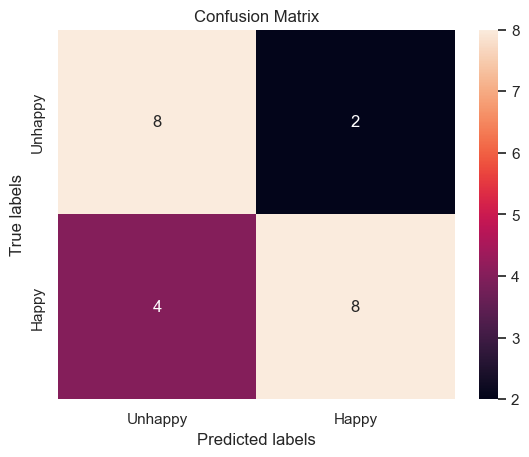

In [48]:
ax=plt.subplot()
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# set labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy'])
ax.yaxis.set_ticklabels(['Unhappy', 'Happy'])

**Evaluate feature importance using coefficients**

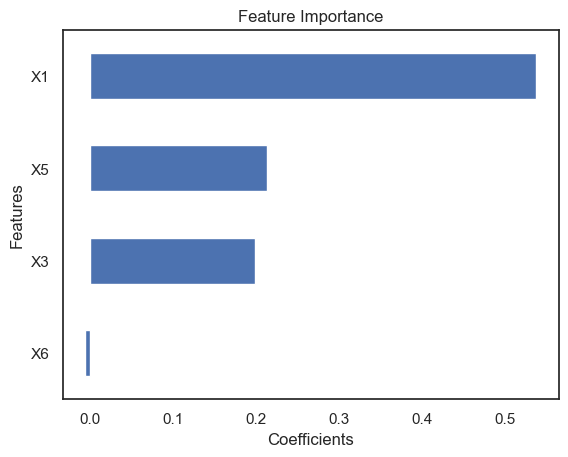

In [49]:
coefficients=pd.Series(model.coef_[0],index=['X1','X3','X5','X6'])
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

It seems like X6 (easiness to place the order through app) doesn't have much contribution to predict happiness of a customer

**Final model**

In [50]:
final_X=features.drop('X6',axis=1)
split_data(final_X,target,0.2,10)

(88, 3) (22, 3)
40     0
85     1
86     1
110    0
3      0
      ..
31     0
75     0
16     0
114    0
10     0
Name: Y, Length: 88, dtype: int64
115    0
90     0
29     1
48     1
61     1
100    1
42     0
46     1
2      1
43     0
57     0
87     0
124    0
116    1
1      0
11     0
44     1
105    1
74     1
56     0
20     1
15     1
Name: Y, dtype: int64


(array([[ 0.84649897, -0.23865177, -0.41785545],
        [ 0.84649897, -0.23865177,  0.41785545],
        [ 0.84649897, -0.23865177,  1.25356634],
        [ 0.84649897, -0.23865177,  0.41785545],
        [ 0.84649897, -0.23865177, -0.41785545],
        [-1.63656468, -0.23865177, -0.41785545],
        [-0.39503285, -0.23865177, -0.41785545],
        [ 0.84649897,  0.7614128 ,  0.41785545],
        [ 0.84649897,  1.76147737,  1.25356634],
        [ 0.84649897, -0.23865177, -1.25356634],
        [-1.63656468, -0.23865177, -2.08927724],
        [ 0.84649897,  1.76147737,  1.25356634],
        [-4.11962833, -2.23878092, -2.08927724],
        [-0.39503285, -2.23878092,  0.41785545],
        [-0.39503285, -0.23865177, -0.41785545],
        [ 0.84649897, -2.23878092,  1.25356634],
        [-0.39503285,  1.76147737, -2.08927724],
        [-0.39503285,  0.7614128 ,  0.41785545],
        [ 0.84649897, -1.23871635, -1.25356634],
        [ 0.84649897,  0.7614128 ,  0.41785545],
        [ 0.84649897

In [51]:
model=LogisticRegression(C=1.0,penalty='l2')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=f1_score(y_test,y_pred)
print('Accuracy of the model is',round(accuracy,3)*100,'%')

Accuracy of the model is 72.7 %


**Conclusion**

1. After conductiong hyperparameter tuning and feature selection, The best performed model is Logistic regression with 73% of accuracy with hyperparameters c=1 and penalty=l2.
2. Delivery of order on time is the main factor for the happiness of the customer, followed by the satisfaction with the courier.